Making a combined lightcurve with flagged data removed.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [14]:
tessfits = glob.glob('tess_fits_files/*fits')
tessfits

['tess_fits_files/tess2019226182529-s0015-0000000259773610-0151-s_lc.fits',
 'tess_fits_files/tess2019253231442-s0016-0000000259773610-0152-s_lc.fits']

<ErrorbarContainer object of 3 artists>

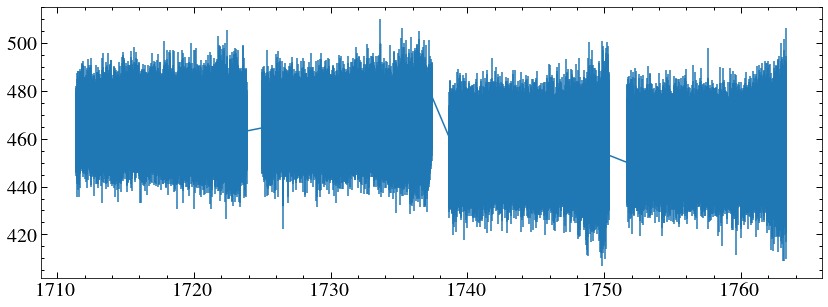

In [19]:
time = np.array([], dtype=float)
flux = np.array([], dtype=float)
fluxn = np.array([], dtype=float)
flux_error = np.array([], dtype=float)
flux_errorn = np.array([], dtype=float)
for ft in tessfits:
    data = fits.getdata(ft, 1)
    t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
    t, f, e = t[q==0], f[q==0], e[q==0]
    time = np.concatenate((time, t))
    flux = np.concatenate((flux, f))
    flux_error = np.concatenate((flux_error, e))
    fluxn = np.concatenate((fluxn, f/np.mean(f)))
    flux_errorn = np.concatenate((flux_errorn, e/np.mean(f)))
plt.errorbar(time, flux, yerr=flux_error)
    

In [20]:
lc = lk.LightCurve(time=time, flux=flux, flux_err=flux_error)
lcn = lk.LightCurve(time=time, flux=fluxn, flux_err=flux_errorn)

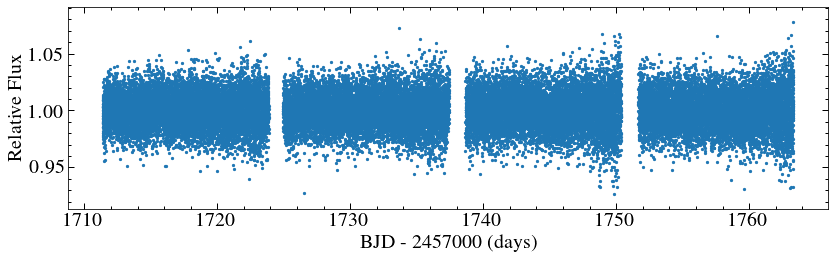

In [30]:
plt.figure(figsize=(12, 4))
plt.scatter(lcn.time, lcn.flux, s=5)
plt.xlabel('BJD - 2457000 (days)')
plt.ylabel('Relative Flux')
plt.tight_layout()
plt.savefig('plots/gd394_tess_lc.pdf', dpi=150)